In [1]:
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
img1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread("1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Adding Noise

In [20]:
import numpy as np
import cv2

def add_gaussian_noise(image, mean, std_dev):
    noise = np.random.normal(mean, std_dev, (image.shape)).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

def add_salt_and_pepper_noise(image):
    img = np.copy(image)  # Create a copy of the image to avoid modifying the original
    row = img.shape[0]
    col = img.shape[1]
    pixels = random.randint(100, 100000)

    for i in range(pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        
        img[y_coord][x_coord] = 255
    
    pixels = random.randint(100, 100000)
    for i in range(pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        
        img[y_coord][x_coord] = 0
    
    return img

gaussian_noisy_image = add_gaussian_noise(img, 0, 25)
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(img1)

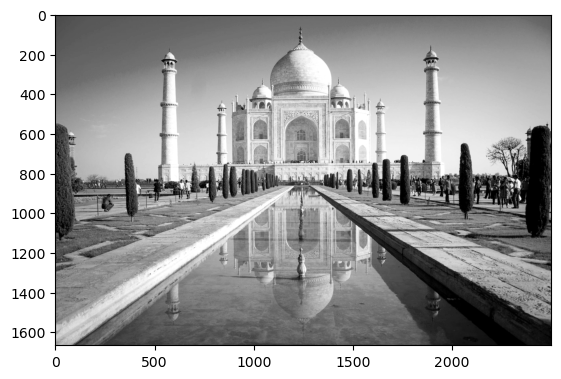

In [8]:
plt.imshow(img1, cmap = "gray")

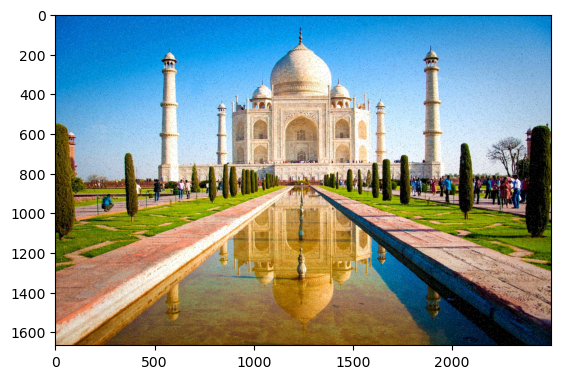

In [9]:
plt.imshow(img)

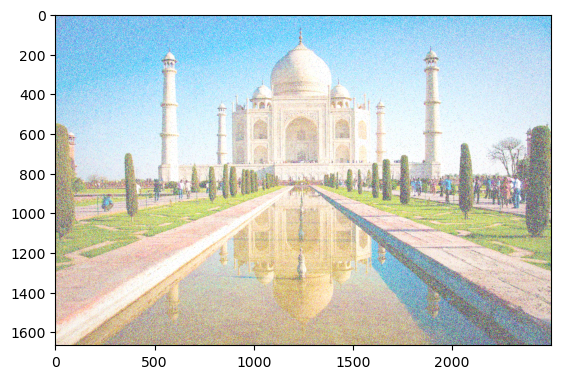

In [21]:
plt.imshow(gaussian_noisy_image)

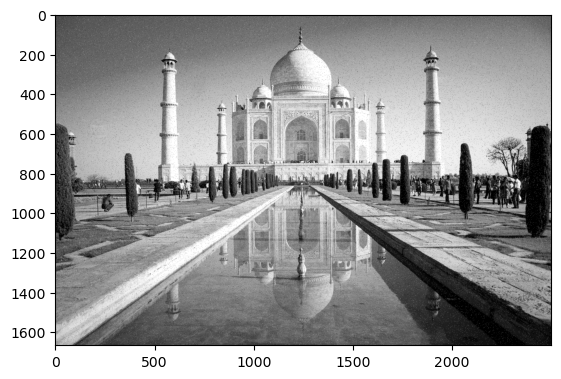

In [22]:
plt.imshow(salt_and_pepper_noisy_image, cmap = "gray")

#### Applying Smoothening Filters 
##### 1) mean  2)median 3)gaussian  4)bilateral

In [57]:
img2 = cv2.imread("taj.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'mean filter')

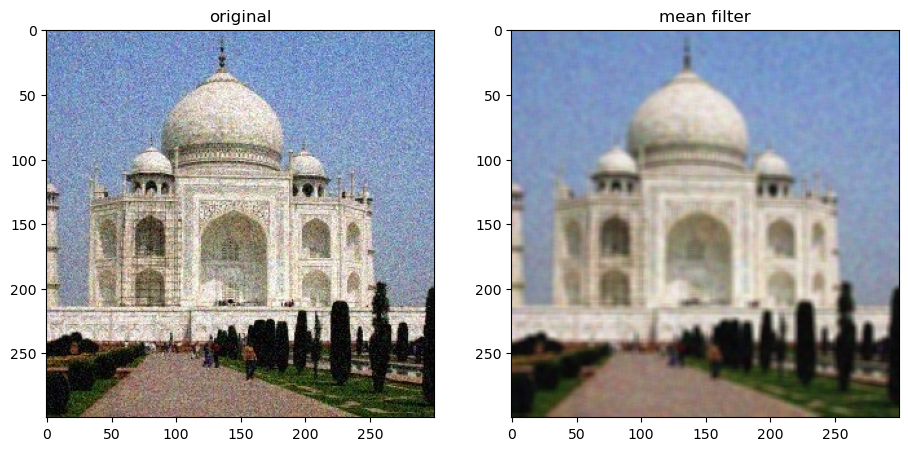

In [62]:
fig_size = 5
mean = cv2.blur(img2, (fig_size, fig_size))
plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img2, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(mean, cmap = "gray")
plt.title("mean filter")

Text(0.5, 1.0, 'median filter')

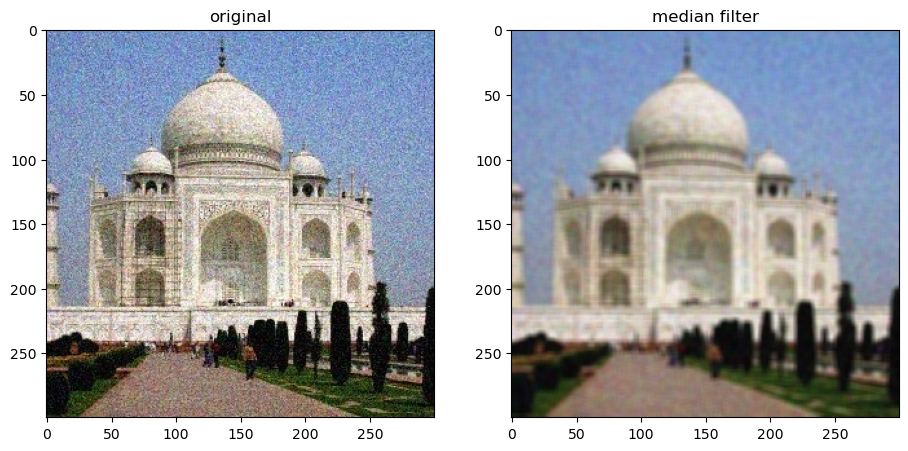

In [63]:
median = cv2.blur(img2, (fig_size, fig_size))
plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img2, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(median, cmap = "gray")
plt.title("median filter")

Text(0.5, 1.0, 'Gaussian filter')

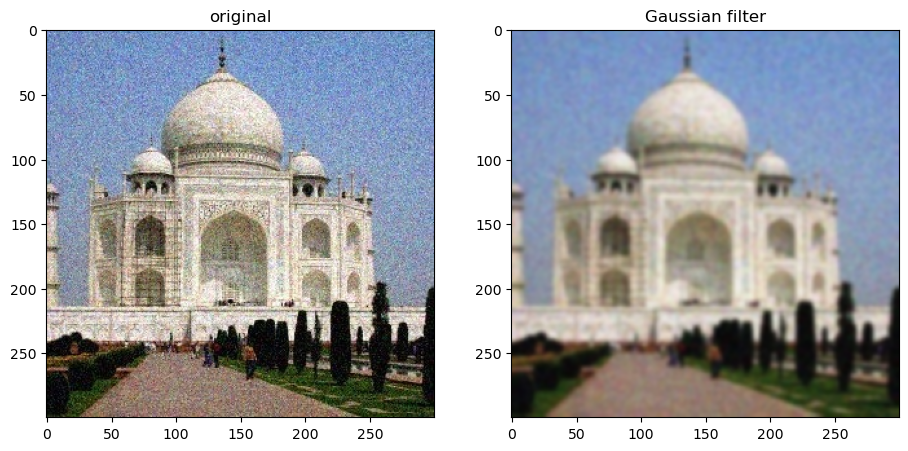

In [56]:
gaussian = cv2.GaussianBlur(img2, (9, 9), 0)
plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img2)
plt.title("original")

plt.subplot(122)
plt.imshow(gaussian)
plt.title("Gaussian filter")

Text(0.5, 1.0, 'Bilateral filter')

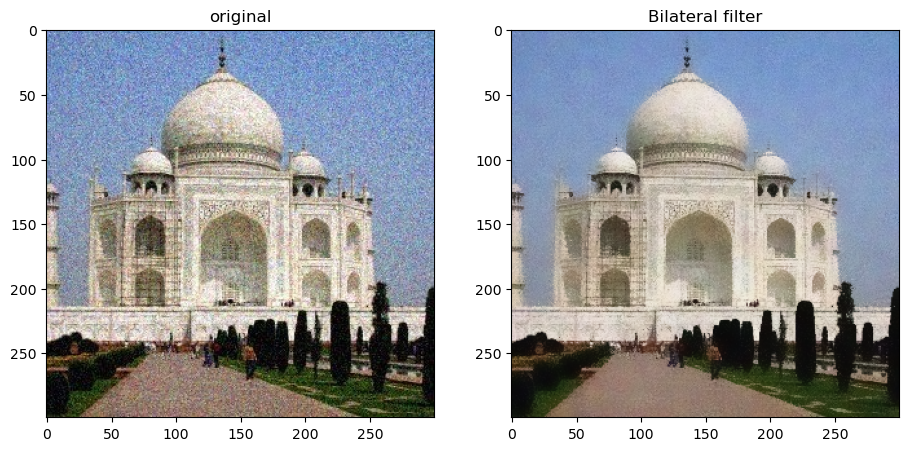

In [53]:
bilateral = cv2.bilateralFilter(img2, 15, 75, 75)

plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img2)
plt.title("original")

plt.subplot(122)
plt.imshow(bilateral)
plt.title("Bilateral filter")

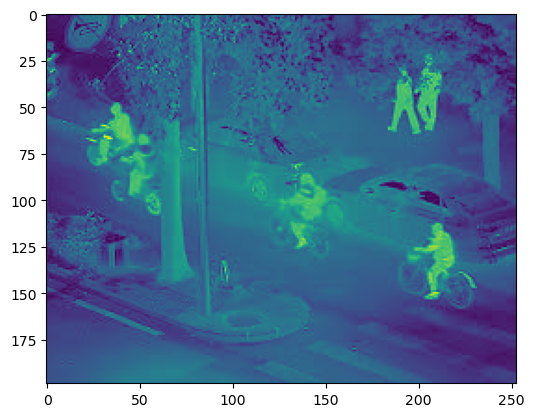

In [95]:
img3 = cv2.imread("2.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY) 
plt.imshow(img3)

Text(0.5, 1.0, 'median filter')

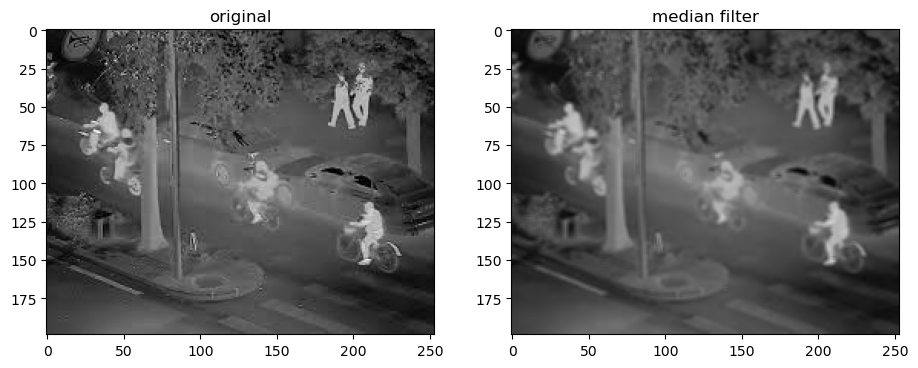

In [73]:
median = cv2.blur(img3, (3, 3))
plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img3, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(median, cmap = "gray")
plt.title("median filter")

In [105]:
def apply_gamma_correction(image, gamma):
    img = np.copy(image)
    gamma_correction = 1.0 / gamma
    # Iterate over each pixel
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            # Get pixel color
            color = img[y, x]
#             print(color)
            # Apply gamma correction to each channel
#             new_red = 255 * (color[2] / 255) ** gamma_correction
#             new_green = 255 * (color[1] / 255) ** gamma_correction
            new_gray = 255 * (color / 255) ** gamma_correction
            # Update pixel color
            img[y, x] = np.array([new_gray], dtype=np.uint8)
    return img

C:\Users\karu0\AppData\Local\Temp\ipykernel_11100\949803410.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img[y, x] = np.array([new_gray], dtype=np.uint8)


Text(0.5, 1.0, 'gamma correction filter')

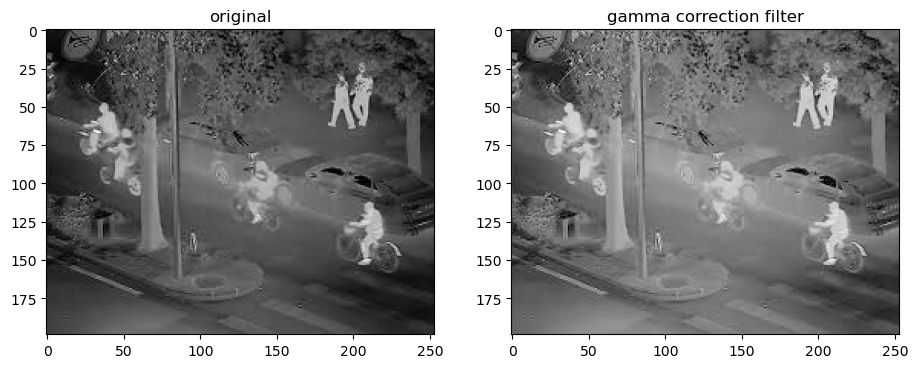

In [106]:

gamma_corrected = apply_gamma_correction(img3, 1.5)
# plt.imshow(img3)

plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img3, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(gamma_corrected, cmap = "gray")
plt.title("gamma correction filter")

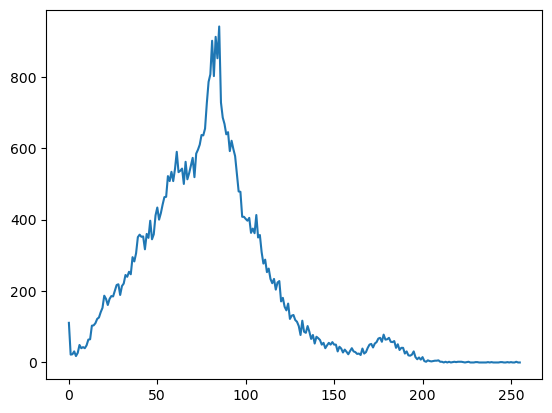

In [91]:
histg = cv2.calcHist([img3],[0],None,[256],[0,256])  
plt.plot(histg) 
plt.show() 

Text(0.5, 1.0, 'hist_eq')

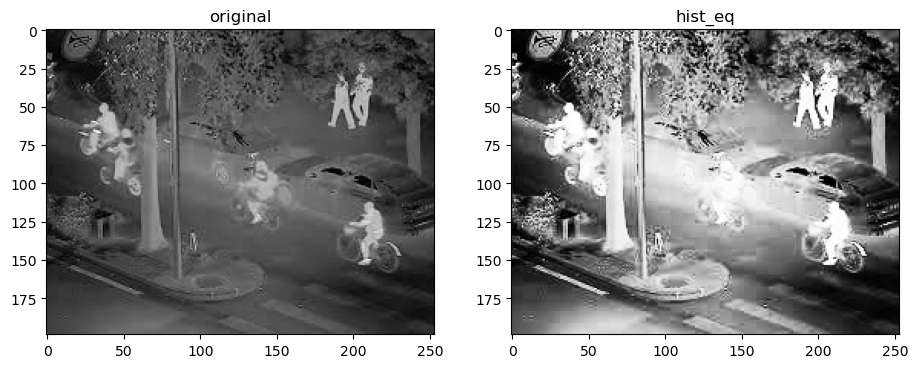

In [96]:
hist_eq = cv2.equalizeHist(img3)

plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(img3, cmap = "gray")
plt.title("original")

plt.subplot(122)
plt.imshow(hist_eq, cmap = "gray")
plt.title("hist_eq")

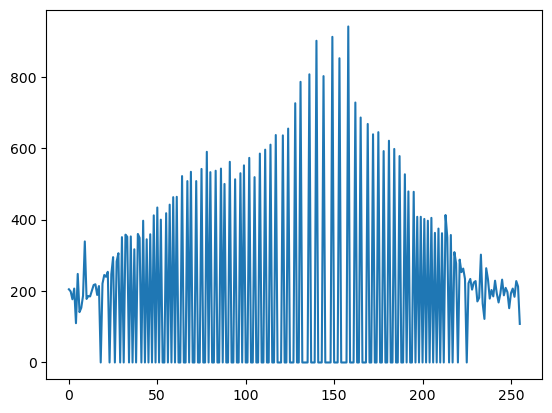

In [100]:
histg = cv2.calcHist([hist_eq],[0],None,[256],[0,256])  
plt.plot(histg) 
plt.show() 

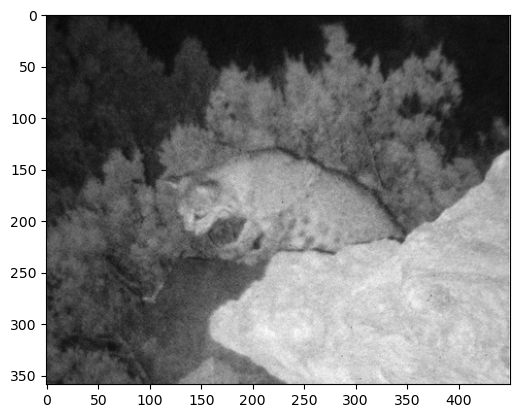

In [108]:
ref = cv2.imread("reference.jpg")
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
plt.imshow(ref, cmap = "gray")

In [110]:
from skimage.exposure import match_histograms

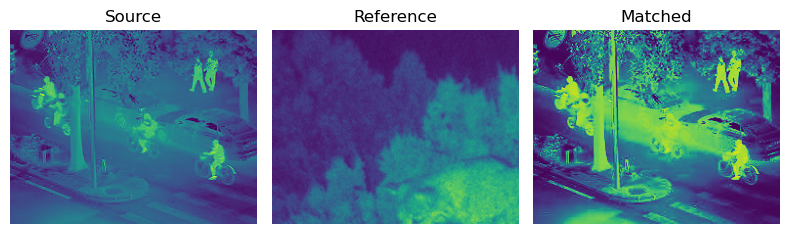

In [113]:
matched = match_histograms(img3, ref) 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,  figsize=(8, 3),sharex=True, sharey=True) 
  
for aa in (ax1, ax2, ax3): 
    aa.set_axis_off() 
  
ax1.imshow(img3) 
ax1.set_title('Source') 
ax2.imshow(ref) 
ax2.set_title('Reference') 
ax3.imshow(matched) 
ax3.set_title('Matched') 
  
plt.tight_layout() 
plt.show() 